정보
 - 상태 전이 확률 $p(s'|s,a)$
 - 보상 함수 $r(s,a,s')$
 - 정책 $\pi(a|s)$

 이걸로 벨만 방정식을 만들고, 연립방정식을 계산하여 $v_\pi(s)$를 얻음<br>
 그래서 연립 방정식을 어떻게 계산함?

# 4.1 동적 프로그래밍과 정책 평가

**정책 평가** - 정책 $\pi$가 주어졌을 때 그 정책의 가치 함수 $v_\pi(s)$ 또는 $q_\pi(s,a)$를 구하는 문제<br>
**정책 제어** - 정책을 조정하여 최적 정책을 만들기

궁극적인 목표는 정책 제어지만, 최적 정책을 구하는 것은 어려우므로 일단 정책 평가부터 하기로 함

$v_\pi(s) = \Sigma_{a,s'}\pi(a|s) \> p(s'|s,a) \> \{r(s,a,s') + \gamma v_\pi(s') \} $
벨만 방정식을 갱신식으로 변형하면,
$V_{k+1}(s) = \Sigma_{a,s'}\pi(a|s) \> p(s'|s,a) \> \{ r(s,a,s') + \gamma V_k(s') \} $

$V_k(s)$ - k번째로 갱신된 가치 함수, 이때 $V_k(s)$는 추정치로 실제 가치 함수인 $v(s)$와 다름

$V_k(s')$을 이용하여 $V_{k+1}$ 갱신, 추정치를 사용하여 추정치를 개선하는 과정을 **부트스트래핑**이라 함

DP 알고리즘
1. $V_0(s)$의 초깃값을 설정 [?] 아무거나 초깃값으로 설정해도 되는가
2. 위 식을 이용해서 $V_i(s)$를 기반으로 $V_{i+1}(s)$ 갱신
3. 반복
4. $V_{\pi}$ 에 점점 가까워짐

예시: 정책 $\pi$에서, 왼쪽과 오른쪽으로 이동할 확률이 각각 0.5<br>
상태 전이가 결정적이므로 $V_{k+1}(s) = \Sigma_a \pi(a|s) \{ r(s,a,s') + \gamma V_k(s') \} $

$V_0(L1) = 0, V_0(L2) = 0$

$V_{k+1}(L1) = 0.5 * (-1 + 0.9V_k(L1)) + 0.5 * (1 + 0.9 * V_k(L2))$

$V_{k+1}(L2) = 0.5 * (0 + 0.9V_k(L1)) + 0.5 * (-1 + 0.9 * V_k(L2))$

[1] 임의로 정한 횟수만큼 갱신

In [ ]:
V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy()

for _ in range(100):
  new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
  new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
  V = new_V.copy()
print(V)

{'L1': -2.2499335965027827, 'L2': -2.7499335965027827}


[2] 임계값을 정해서 갱신

In [ ]:
V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy()
cnt = 0

while True:
  cnt += 1
  new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
  new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])

  delta = max(abs(new_V['L1'] - V['L1']), abs(new_V['L2'] - V['L2']))
  V = new_V.copy()

  if delta < 0.0001:
    break
print(V)
print(cnt)

{'L1': -2.249167525908671, 'L2': -2.749167525908671}
76


[3] 덮어쓰기 방식

In [ ]:
V = {'L1': 0.0, 'L2': 0.0}
cnt = 0

while True:
  cnt += 1
  t = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
  delta = abs(t-V['L1'])
  V['L1'] = t

  t = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
  delta = max(delta, abs(t-V['L2']))
  V['L2'] = t

  if delta < 0.0001:
    break
print(V)
print(cnt)

{'L1': -2.2493782177156936, 'L2': -2.7494201578106514}
60


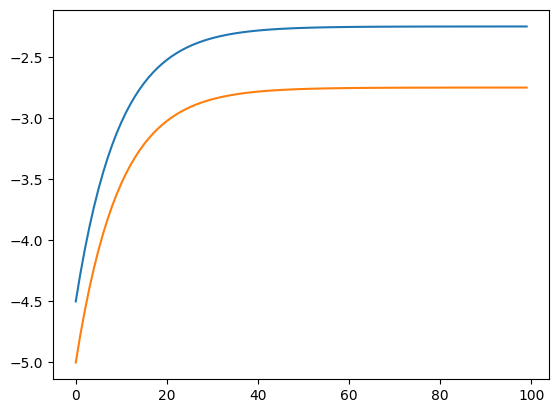

In [ ]:
import matplotlib.pyplot as plt

V = {'L1': 10.0, 'L2': -20.0}
new_V = V.copy()
Y1 = []
Y2 = []

for _ in range(100):
  new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
  new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
  Y1.append(new_V['L1'])
  Y2.append(new_V['L2'])
  V = new_V.copy()

plt.plot(Y1)
plt.plot(Y2)
plt.show()

# 4.2 더 큰 문제를 향해

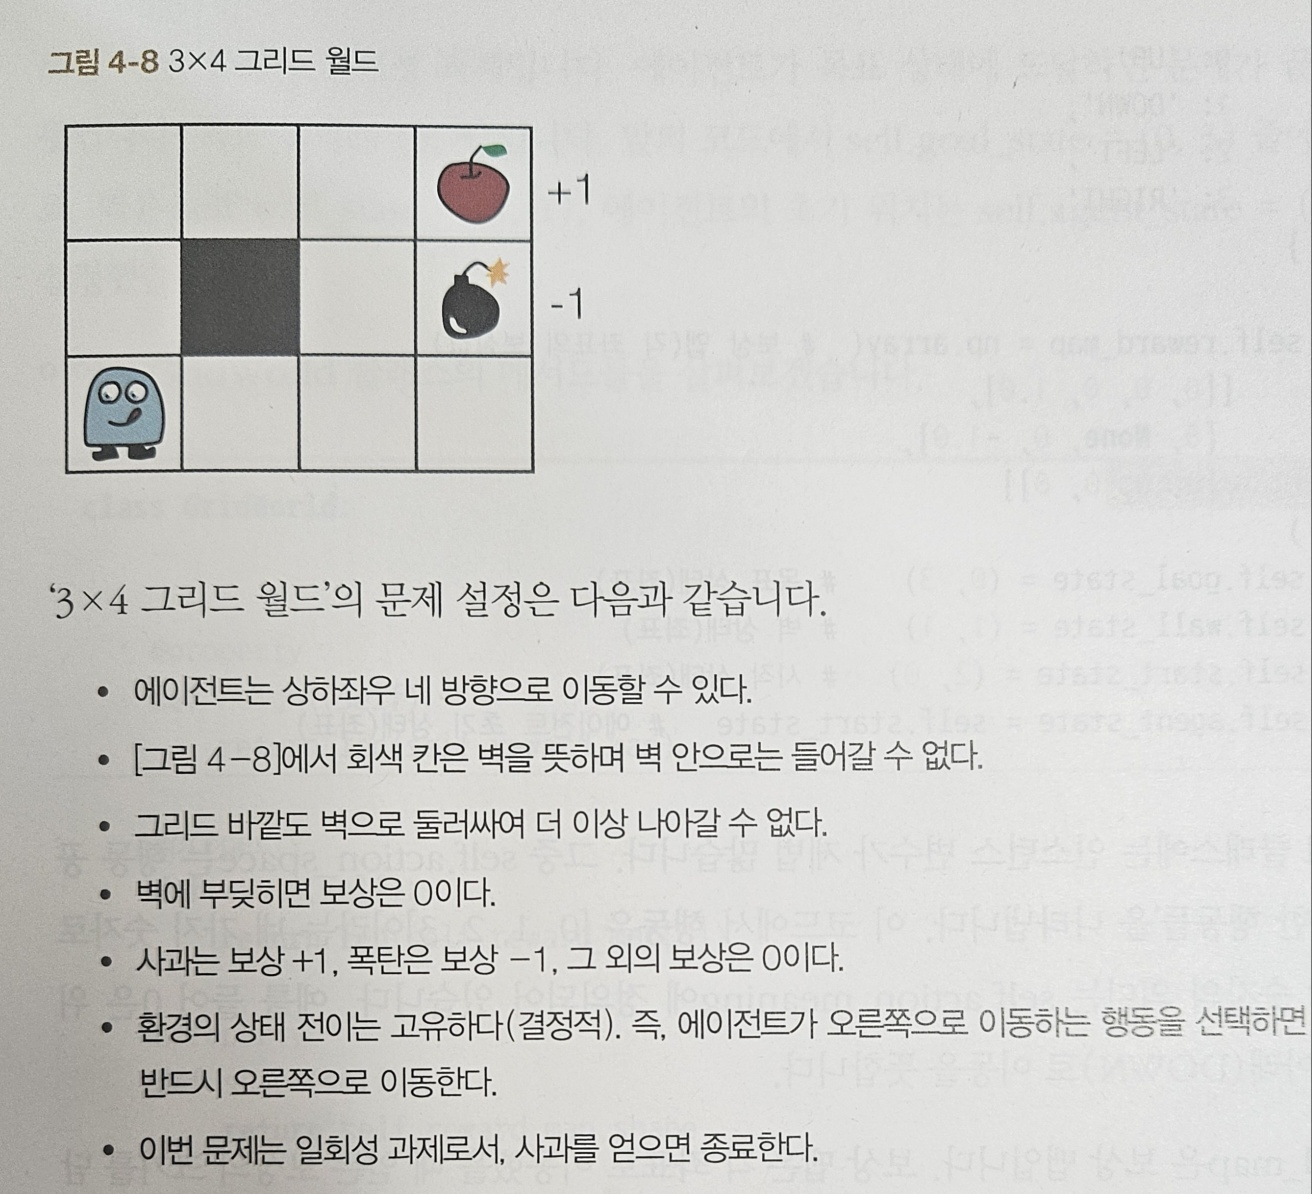

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/RL

/content/drive/MyDrive/RL


In [ ]:
from common.gridworld import GridWorld
import numpy as np
from collections import defaultdict

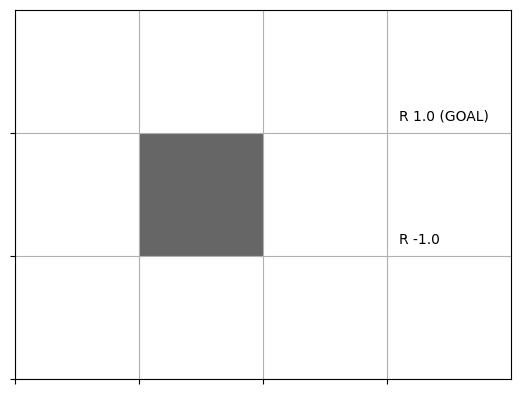

In [ ]:
env = GridWorld()
env.render_v()

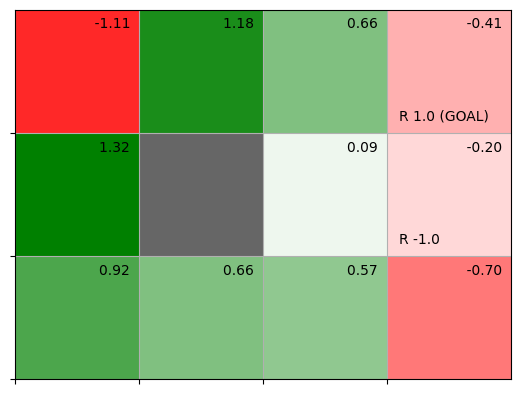

In [ ]:
V = {}
for state in env.states():
  V[state] = np.random.randn()
env.render_v(V)

In [ ]:
pi = defaultdict(lambda: {0:0.25, 1:0.25, 2:0.25, 3:0.25})
  # lambda: defaultdict의 기본값 설정
  # 각 이동 방향을 동일한 확률로 랜덤 선택
state = (0,1)
print(pi[state])

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


In [ ]:
#가치 함수를 1번 갱신 / 모든 상태에 대한 가치 함수인 V_k를 줬을 때 V_k+1을 리턴
def eval_onestep(pi, V, env, gamma = 0.9):
  for state in env.states():
    if state == env.goal_state:
      V[state] = 0
      continue

    action_probs = pi[state] #action_probablities
    new_v = 0

    for action, action_prob in action_probs.items():
      next_state = env.next_state(state, action)
      reward = env.reward(state, action, next_state)
      new_v += action_prob * (reward + gamma * V[next_state])

    V[state] = new_v
  return V

In [ ]:
#가치 함수를 여러 번 갱신 한 뒤 리턴
def policy_eval(pi, V, env, gamma, threshold = 0.001):
  while True:
    old_V = V.copy()  #갱신 전 가치 함수
    V = eval_onestep(pi, V, env, gamma)

    #모든 상태에 대해, 갱신 전후 함수값 차이를 계산한 뒤 그것의 최댓값 리턴
    env.render_v(V, pi)
    max_diff = max([abs(V[state] - old_V[state]) for state in env.states()])
    if max_diff < threshold:
      break

  return V

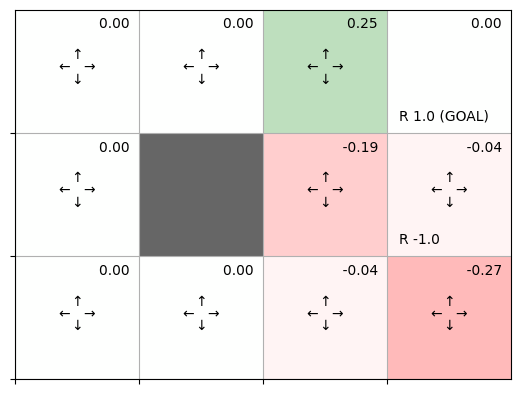

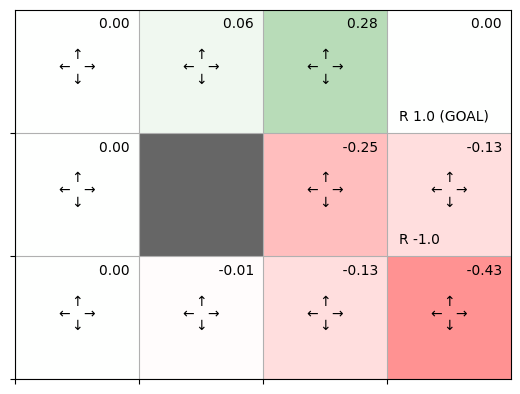

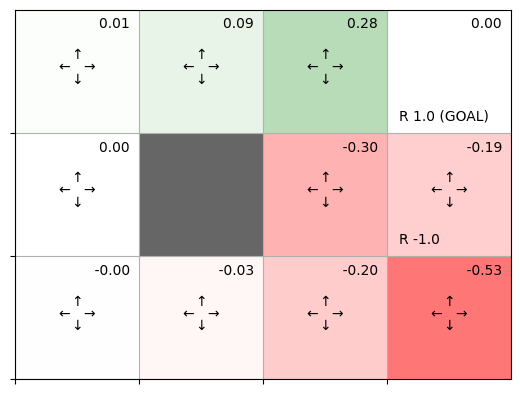

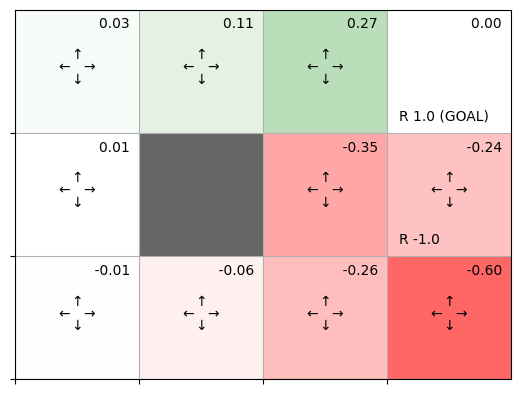

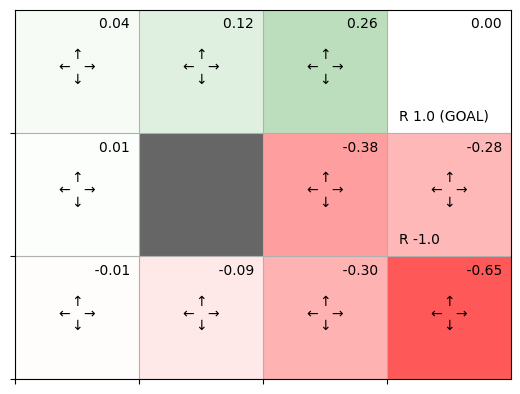

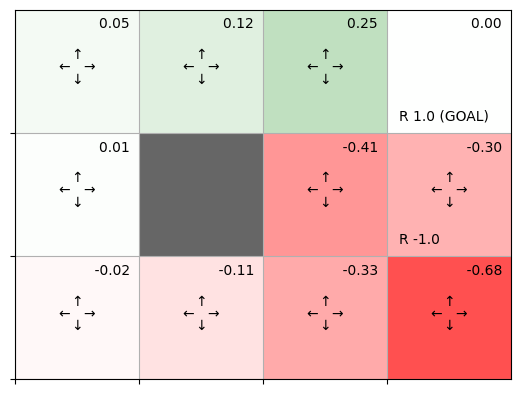

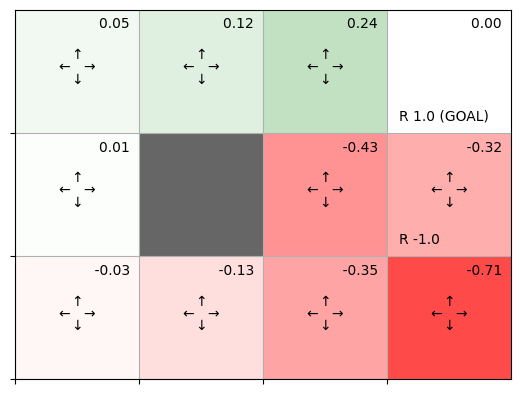

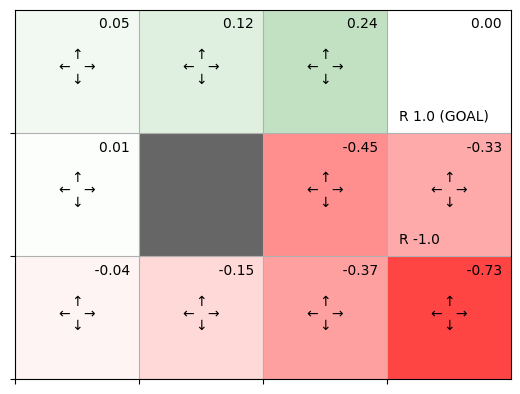

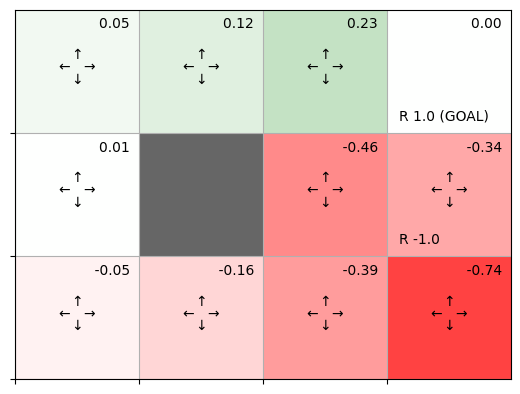

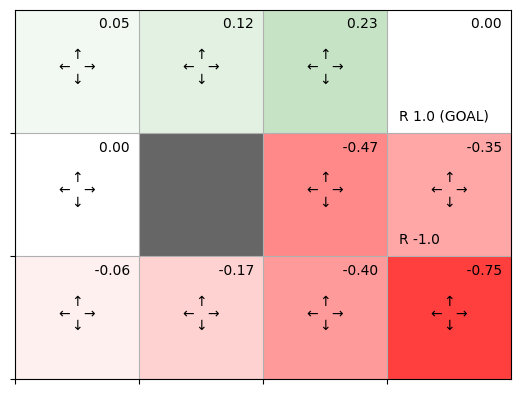

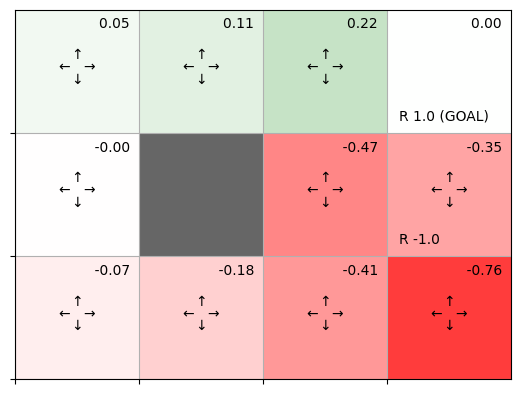

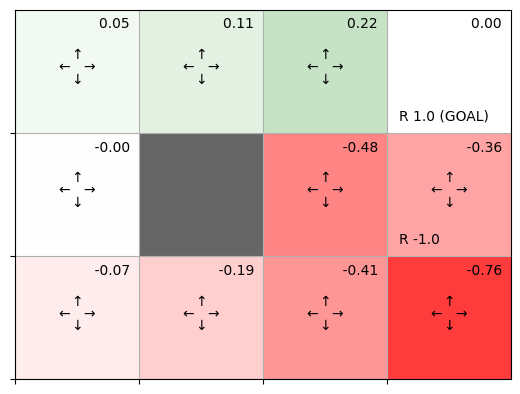

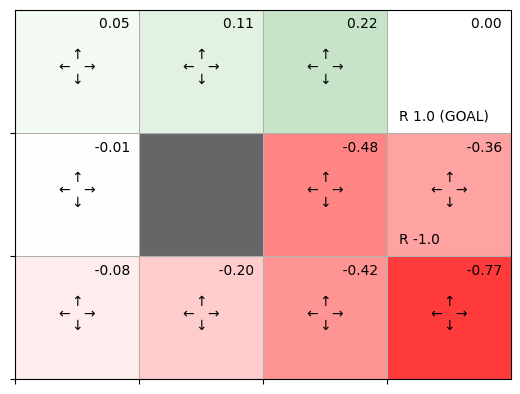

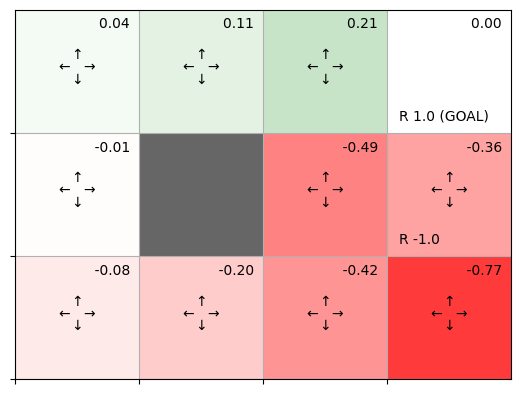

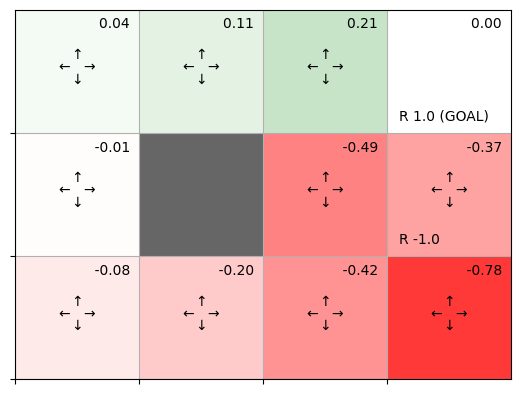

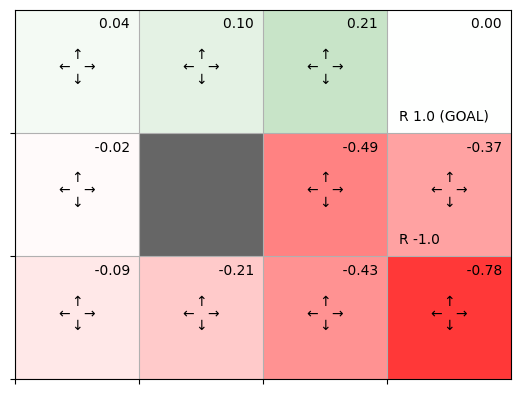

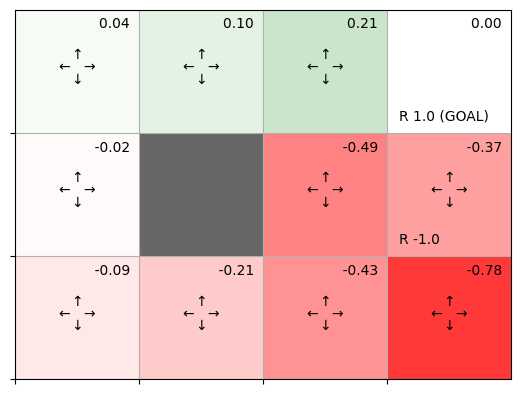

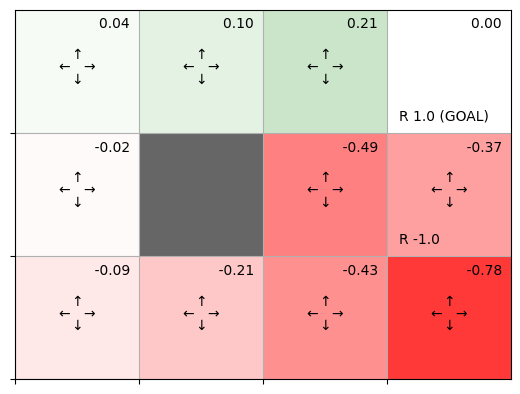

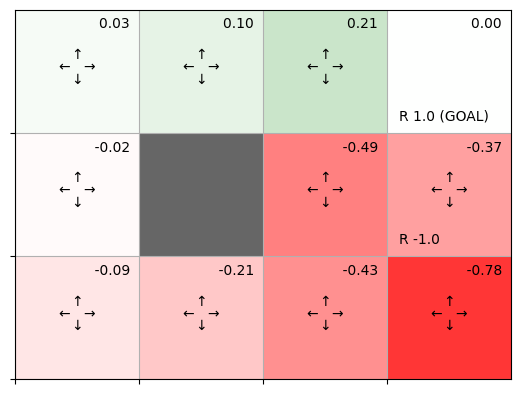

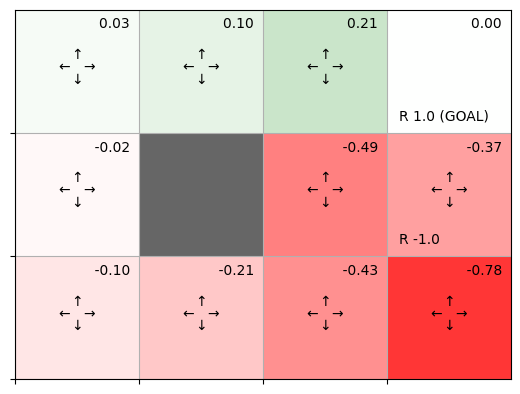

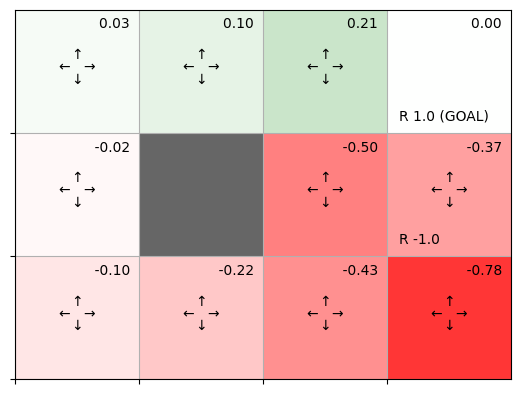

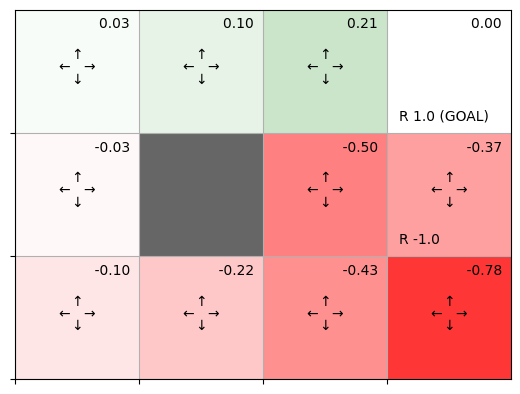

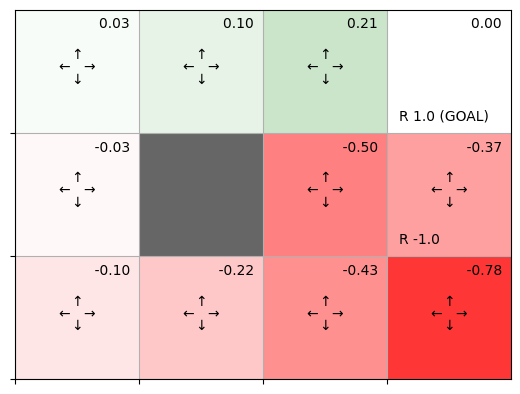

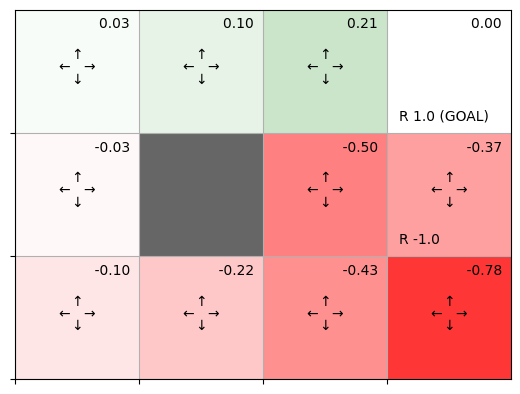

In [ ]:
gamma = 0.9
V = defaultdict(lambda: 0)
pi = defaultdict(lambda: {0:0.25, 1:0.25, 2:0.25, 3:0.25})
V = policy_eval(pi, V, env, gamma)
env.render_v(V, pi)

# 4.3 정책 반복법

최적 정책

$\mu_*(s)
\\ = argmax_a q_*(s,a)
\\ = argmax_a \Sigma_{s'} p(s'|s,a) \{ r(s,a,s') + \gamma v_*(s') \}$

상태 s가 주어졌을 때 최대 가치를 내는 행동 a만을 하는 정책 [**탐욕 정책**]

\
임의의 결정적 정책

$\mu'(s)
\\ = argmax_a q_\mu(s,a)
\\ = argmax_a \Sigma_{s'} p(s'|s,a) \{ r(s,a,s') + \gamma v_\mu (s') \} $

$\mu(s)$ - 현 상태의 정책<br>
$v_\mu(s)$ - 정책 $\mu(s)$의 가치 함수<br>
$\mu'(s)$ - 새로운 정책

모든 상태 $s$에서 $\mu'(s)$가 갱신되지 않는다면, $\mu(s)$는 이미 최적 정책이라는 뜻

정책 반복법: 평가와 개선을 반복하는 알고리즘
1. $\pi_0$ 정책에서 시작, $\pi_0$는 확률적일 수 있으므로 $\mu_0(s)$가 아닌 $\pi_0(s|a)$로 표기함
2. $\pi_0$의 가치 함수를 평가하여 $V_0$를 얻음 (반복적 정책 평가 알고리즘 이용)
3. 가치 함수 $V_0$를 이용하여 탐욕화 수행, $\mu_1$ 정책을 획득
4. 1~3 반복

# 4.4 정책 반복법 구현

In [ ]:
#dict가 주어지면 d에서 가장 큰 값을 갖고, 그것의 키를 리턴
def argmax(d):
  max_value = max(d.values())
  max_key = 0
  for key, value in d.items():
    if value == max_value:
      max_key = key
  return max_key

In [ ]:
# 특정 state에서는 반드시 무슨 action을 취하는지 알려주는 탐욕적 정책 반환
def greedy_policy(V, env, gamma):
  pi = {}
  for state in env.states():
    action_values = {}

    for action in env.actions():
      next_state = env.next_state(state, action)
      r = env.reward(state, action, next_state)
      value = r + gamma * V[next_state]
      action_values[action] = value

    max_action = argmax(action_values)
    action_probs = {0:0, 1:0, 2:0, 3:0}
    action_probs[max_action] = 1.0
    pi[state] = action_probs

  return pi

In [ ]:
def policy_iter(env, gamma, threshold = 0.001, is_render = False):
  pi = defaultdict(lambda: {0:0.25, 1:0.25, 2:0.25, 3:0.25})
  V = defaultdict(lambda: 0)

  while True:
    V = policy_eval(pi, V, env, gamma, threshold) #평가
    new_pi = greedy_policy(V, env, gamma)         #개선

    if is_render:
      env.render_v(V, pi)

    if pi == new_pi:
      break

    pi = new_pi

  return pi

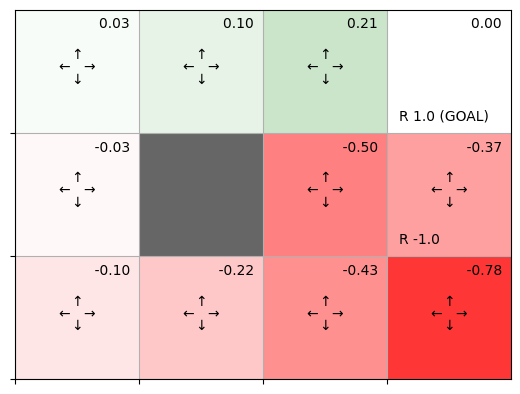

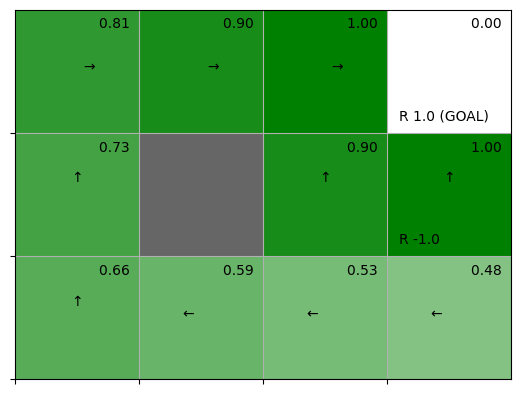

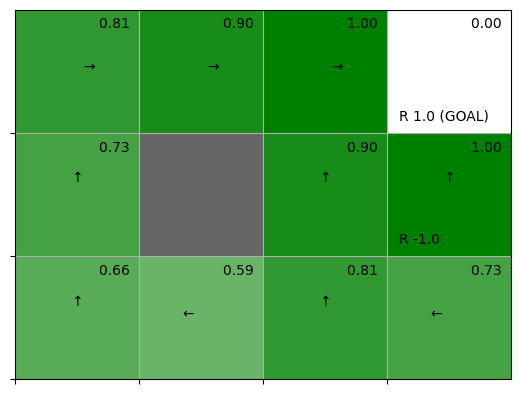

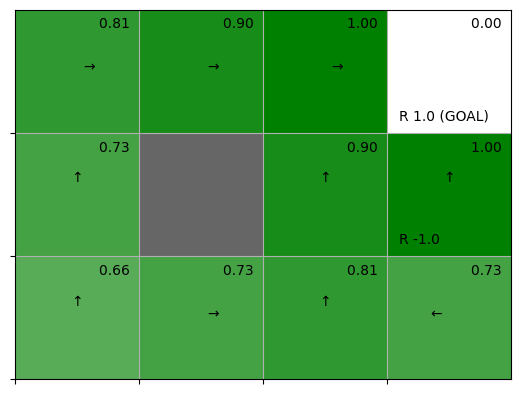

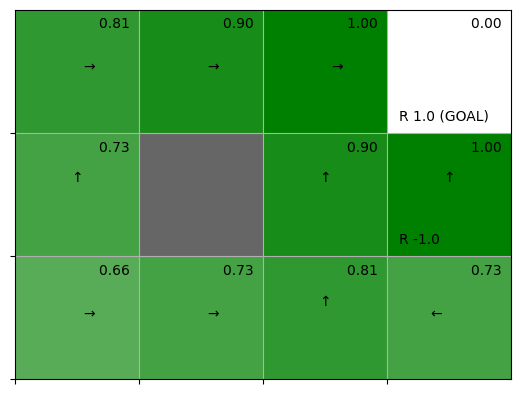

In [ ]:
env = GridWorld()
gamma = 0.9
pi = policy_iter(env, gamma, is_render = True)

# 4.5 가치 반복법

정책 반복법: 평가와 개선을 할 때, **모든 state와 action**에 대해 가치 함수와 정책을 업데이트함.<br>
이때 가치 함수는 앞선 DP 알고리즘에 의해 **여러 번** 갱신됨

가치 반복법: 하나의 상태만 1번 갱신하고 바로 개선

개선 단계 <br>
$\mu(s) = argmax_a \Sigma_{s'} p(s'|s,a) \{ r(s,a,s') + \gamma V(s') \} $

평가 단계 <br>
$V'(s) = \Sigma_{a,s'}\pi(a|s) \> p(s'|s,a) \> \{ r(s,a,s') + \gamma V(s') \} $<br>
결정적 정책일 경우, $a = \mu(s)$일 때<br>
$V'(s) = \Sigma_{s'} \> p(s'|s,a) \> \{ r(s,a,s') + \gamma V(s') \} $

이때, $ p(s'|s,a) \> \{ r(s,a,s') + \gamma V(s') \} $ 부분이 중복됨,
그러므로 다음과 같이 줄일 수 있음:

$V'(s) = max_a\Sigma_{s'} \> p(s'|s,a) \> \{ r(s,a,s') + \gamma V(s') \} $

In [ ]:
def value_iter_onestep(V, env, gamma):
  for state in env.states():
    if state == env.goal_state:
      V[state] = 0
      continue

    action_values = []
    for action in env.actions():
      next_state = env.next_state(state, action)
      r = env.reward(state, action, next_state)
      value = r + gamma * V[next_state]
      action_values.append(value)

    V[state] = max(action_values)
  return V

In [ ]:
def value_iter(V, env, gamma, threshold = 0.001, is_render = True):
  while True:
    if is_render:
      env.render_v(V)

    old_V = V.copy()
    V = value_iter_onestep(V, env, gamma)

    max_diff = max([abs(V[state] - old_V[state]) for state in V.keys()])
    if max_diff < threshold:
      break

  return V

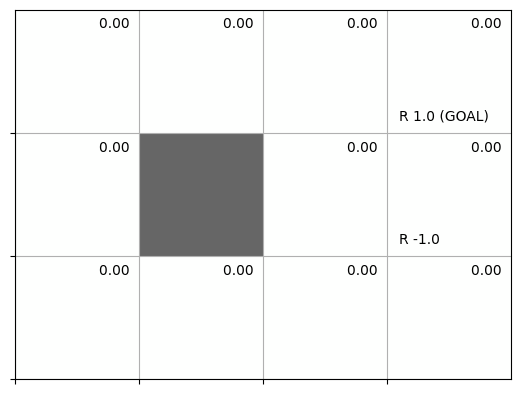

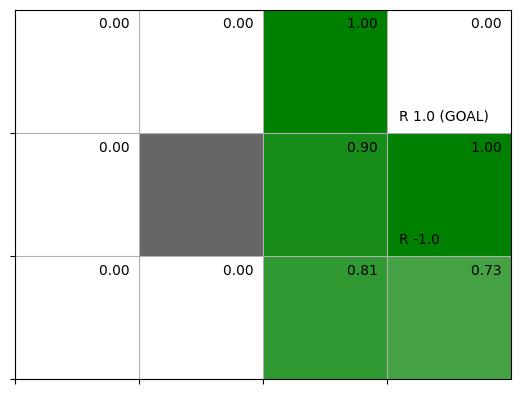

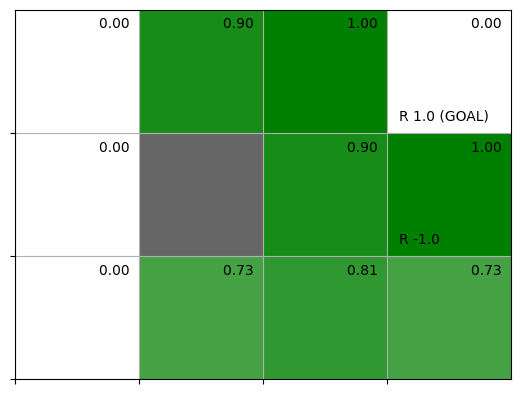

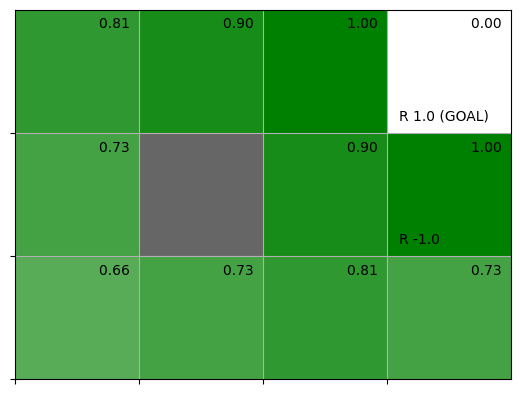

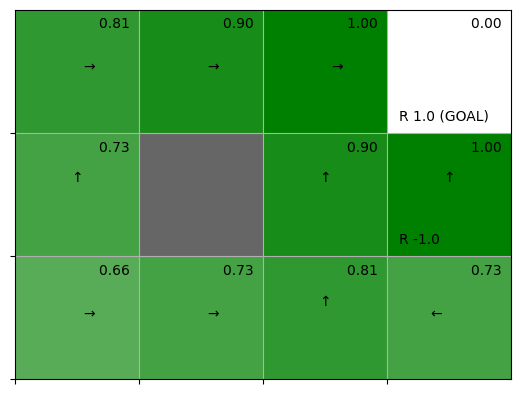

In [ ]:
V = defaultdict(lambda:0)
env = GridWorld()
gamma = 0.9

V = value_iter(V, env, gamma)
pi = greedy_policy(V, env, gamma)
env.render_v(V, pi)